<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_500\44148139.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


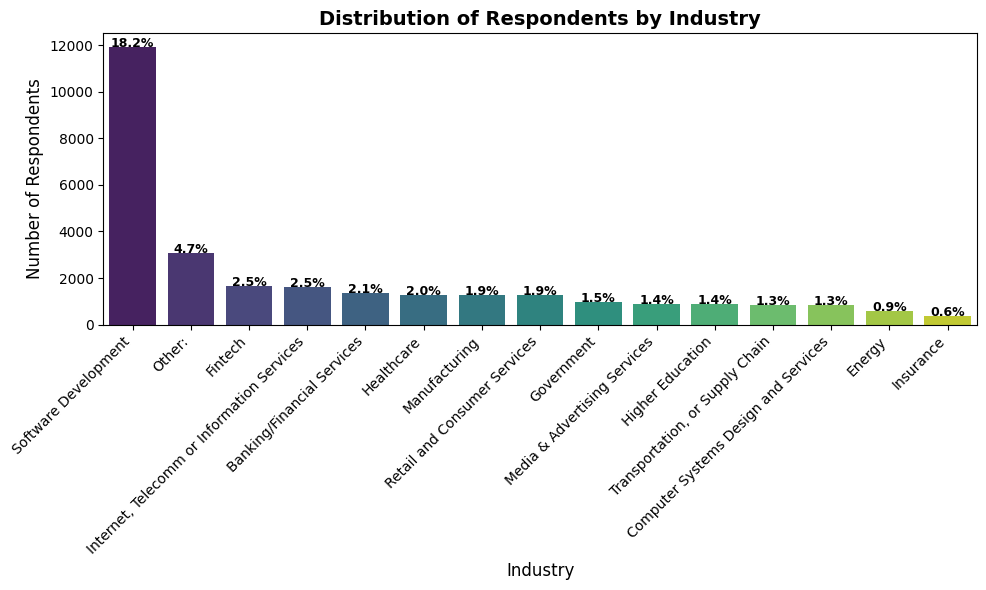

Respondent distribution by industry (%):
Industry
Software Development                          18.21
Other:                                         4.70
Fintech                                        2.51
Internet, Telecomm or Information Services     2.49
Banking/Financial Services                     2.10
Healthcare                                     1.95
Manufacturing                                  1.93
Retail and Consumer Services                   1.93
Government                                     1.47
Media & Advertising Services                   1.37
Higher Education                               1.36
Transportation, or Supply Chain                1.31
Computer Systems Design and Services           1.29
Energy                                         0.88
Insurance                                      0.59
Name: count, dtype: float64

📊 Notable Trends:
Top 3 industries with highest respondent share:
Industry
Software Development    18.21
Other:                   4.70
Fintec

In [3]:
##Write your code here

# Step 2 (Final): Distribution of Industry with Percentages + Notable Trends

plt.figure(figsize=(10,6))

# Count and percentage
industry_counts = df["Industry"].value_counts()
industry_percent = (industry_counts / len(df)) * 100

# Barplot
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(industry_counts.values, industry_percent.values)):
    plt.text(i, count + 2, f"{pct:.1f}%", ha="center", fontsize=9, weight="bold")

# Formatting
plt.title("Distribution of Respondents by Industry", fontsize=14, weight="bold")
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print detailed percentages
print("Respondent distribution by industry (%):")
print(industry_percent.round(2))

# --- Highlight notable trends ---
print("\n📊 Notable Trends:")
print("Top 3 industries with highest respondent share:")
print(industry_percent.head(3).round(2))

print("\nBottom 3 industries with lowest respondent share:")
print(industry_percent.tail(3).round(2))

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# %%
# Step 3: Identify High Compensation Outliers

# Ensure the column is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values
comp_data = df["ConvertedCompYearly"].dropna()

# Calculate basic statistics
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

print("Basic Statistics for ConvertedCompYearly:")
print(f"  Mean:   {mean_comp:,.2f}")
print(f"  Median: {median_comp:,.2f}")
print(f"  Std:    {std_comp:,.2f}")

# Define threshold for outliers (3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp

# Identify high compensation outliers
high_outliers = df[df["ConvertedCompYearly"] > threshold]

print(f"\nOutlier Threshold: {threshold:,.2f}")
print(f"Number of High Compensation Outliers: {len(high_outliers)}")

# Display top 10 outliers
high_outliers[["ConvertedCompYearly", "Industry"]].head(10)

Basic Statistics for ConvertedCompYearly:
  Mean:   86,155.29
  Median: 65,000.00
  Std:    186,756.97

Outlier Threshold: 646,426.21
Number of High Compensation Outliers: 89


,ConvertedCompYearly,Industry
529,650000.0,Software Development
828,1000000.0,Retail and Consumer Services
1932,945000.0,Insurance
2171,750000.0,Banking/Financial Services
2187,2000000.0,NaN
2316,1000000.0,Software Development
2592,800000.0,Software Development
3024,1302817.0,NaN
5934,1031099.0,NaN
6735,650000.0,Other:


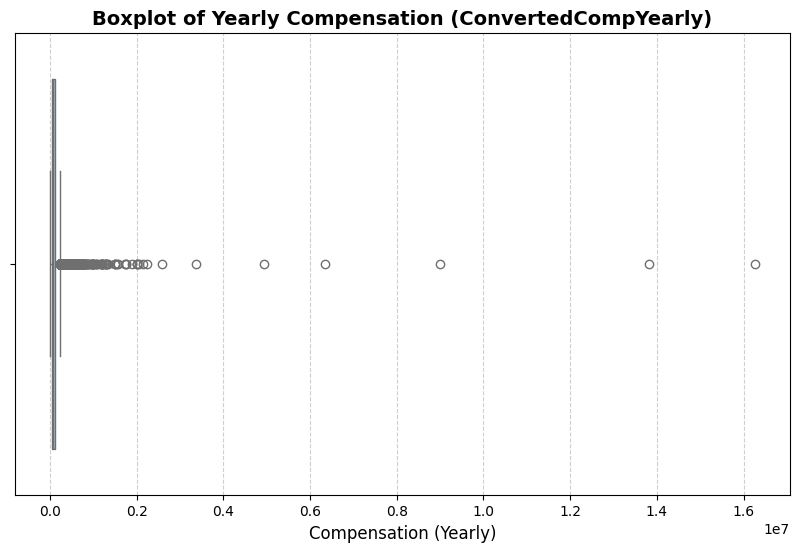

In [5]:

# Boxplot visualization for ConvertedCompYearly
plt.figure(figsize=(10,6))
sns.boxplot(x=df["ConvertedCompYearly"], color="skyblue")

plt.title("Boxplot of Yearly Compensation (ConvertedCompYearly)", fontsize=14, weight="bold")
plt.xlabel("Compensation (Yearly)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR Method for Outlier Detection:
  Q1 (25th percentile): 32,712.00
  Q3 (75th percentile): 107,971.50
  IQR: 75,259.50
  Lower Bound: -80,177.25
  Upper Bound: 220,860.75

Number of Outliers Detected: 978


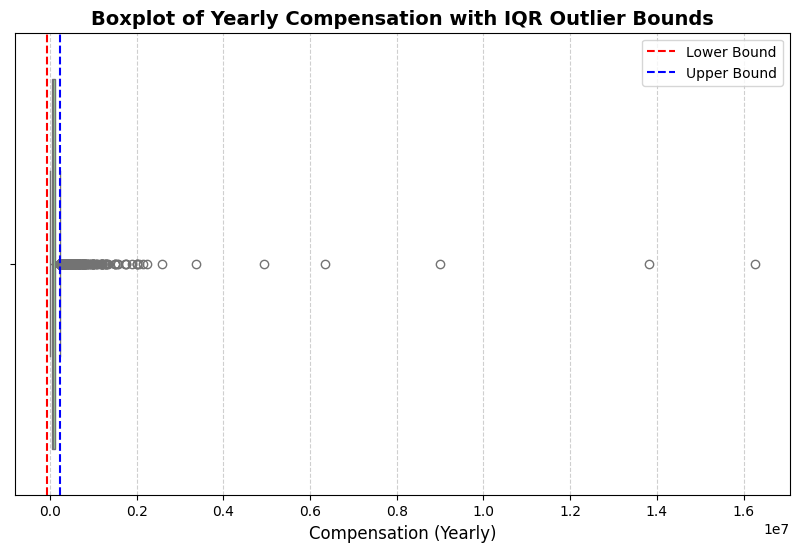

In [6]:
##Write your code here

# Step 4: Detect Outliers in Compensation using IQR

# Ensure the column is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values
comp_data = df["ConvertedCompYearly"].dropna()

# Calculate Q1, Q3 and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR Method for Outlier Detection:")
print(f"  Q1 (25th percentile): {Q1:,.2f}")
print(f"  Q3 (75th percentile): {Q3:,.2f}")
print(f"  IQR: {IQR:,.2f}")
print(f"  Lower Bound: {lower_bound:,.2f}")
print(f"  Upper Bound: {upper_bound:,.2f}")

# Identify outliers
iqr_outliers = df[(df["ConvertedCompYearly"] < lower_bound) | 
                  (df["ConvertedCompYearly"] > upper_bound)]

print(f"\nNumber of Outliers Detected: {len(iqr_outliers)}")

# --- Visualization with Boxplot ---
plt.figure(figsize=(10,6))
sns.boxplot(x=comp_data, color="lightgreen")

# Add threshold lines for clarity
plt.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
plt.axvline(upper_bound, color="blue", linestyle="--", label="Upper Bound")

plt.title("Boxplot of Yearly Compensation with IQR Outlier Bounds", fontsize=14, weight="bold")
plt.xlabel("Compensation (Yearly)", fontsize=12)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
##Write your code here
# %%
# Step 5: Remove Outliers and Create a New DataFrame

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values
comp_data = df["ConvertedCompYearly"].dropna()

# Recalculate Q1, Q3, and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create new DataFrame without outliers
df_no_outliers = df[(df["ConvertedCompYearly"] >= lower_bound) & 
                    (df["ConvertedCompYearly"] <= upper_bound)]

# Validate size before and after
print("Original DataFrame size:", df.shape)
print("New DataFrame size (without outliers):", df_no_outliers.shape)
print("Number of rows removed:", df.shape[0] - df_no_outliers.shape[0])

# Quick check: summary of compensation without outliers
print("\nSummary of ConvertedCompYearly (without outliers):")
print(df_no_outliers["ConvertedCompYearly"].describe())

Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (22457, 114)
Number of rows removed: 42980

Summary of ConvertedCompYearly (without outliers):
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


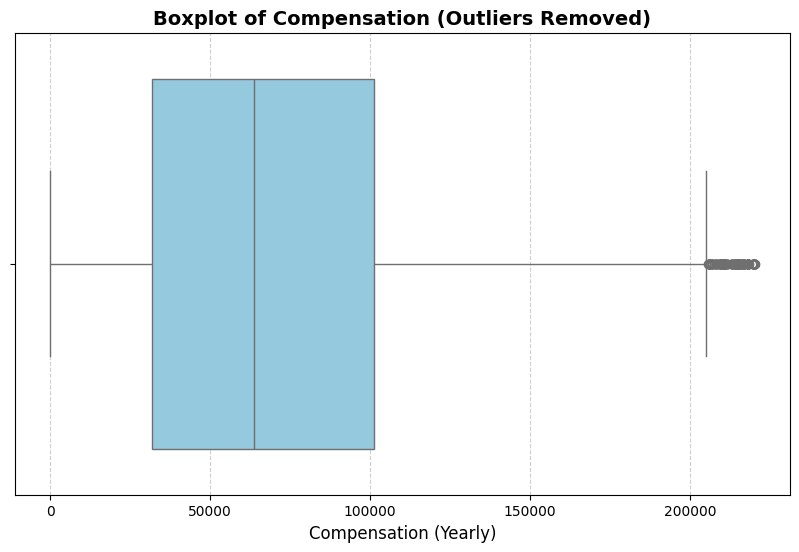

In [8]:
#1. Boxplot (without outliers)

#This shows the spread of the data after removal, making the middle 50% clearer.
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers["ConvertedCompYearly"], color="skyblue")
plt.title("Boxplot of Compensation (Outliers Removed)", fontsize=14, weight="bold")
plt.xlabel("Compensation (Yearly)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

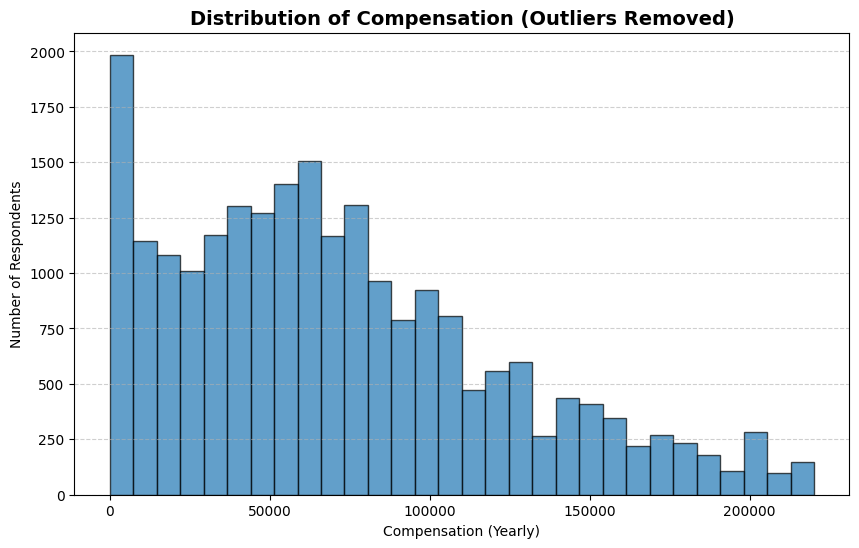

In [9]:
# 2. Histogram

# Histograms reveal the frequency distribution, which will now look much cleaner.
plt.figure(figsize=(10,6))
plt.hist(df_no_outliers["ConvertedCompYearly"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of Compensation (Outliers Removed)", fontsize=14, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.ylabel("Number of Respondents")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

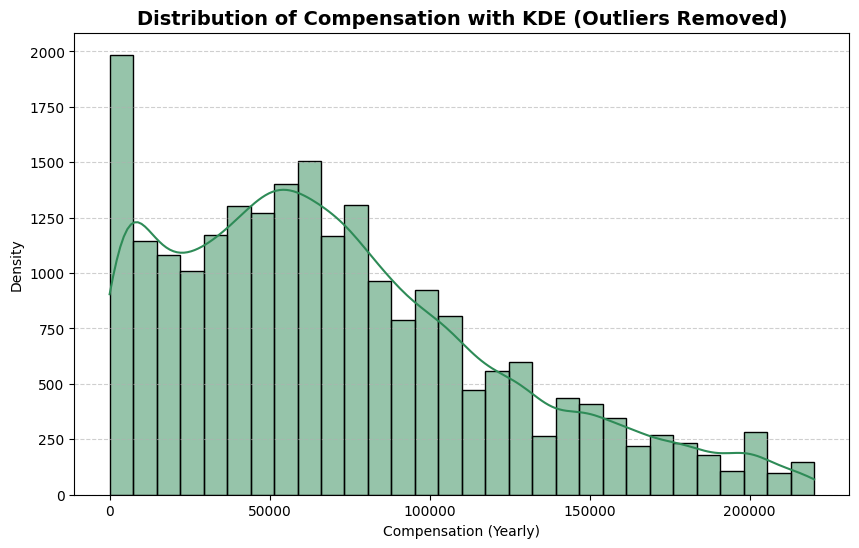

In [10]:
# 3. Histogram + KDE Curve (smooth trend)

# This adds a smooth curve to show the distribution’s shape.
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers["ConvertedCompYearly"], bins=30, kde=True, color="seagreen")
plt.title("Distribution of Compensation with KDE (Outliers Removed)", fontsize=14, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


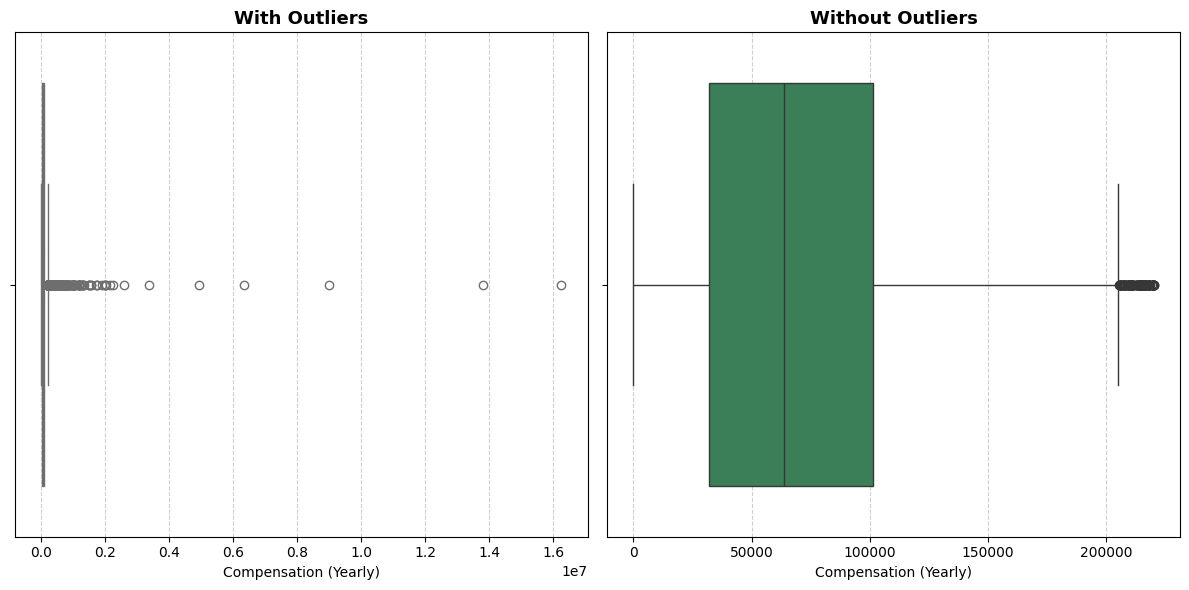

In [11]:
#A side-by-side comparison
# Boxplot Comparison
plt.figure(figsize=(12,6))

# Boxplot with outliers
plt.subplot(1,2,1)
sns.boxplot(x=df["ConvertedCompYearly"], color="lightcoral")
plt.title("With Outliers", fontsize=13, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Boxplot without outliers
plt.subplot(1,2,2)
sns.boxplot(x=df_no_outliers["ConvertedCompYearly"], color="seagreen")
plt.title("Without Outliers", fontsize=13, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


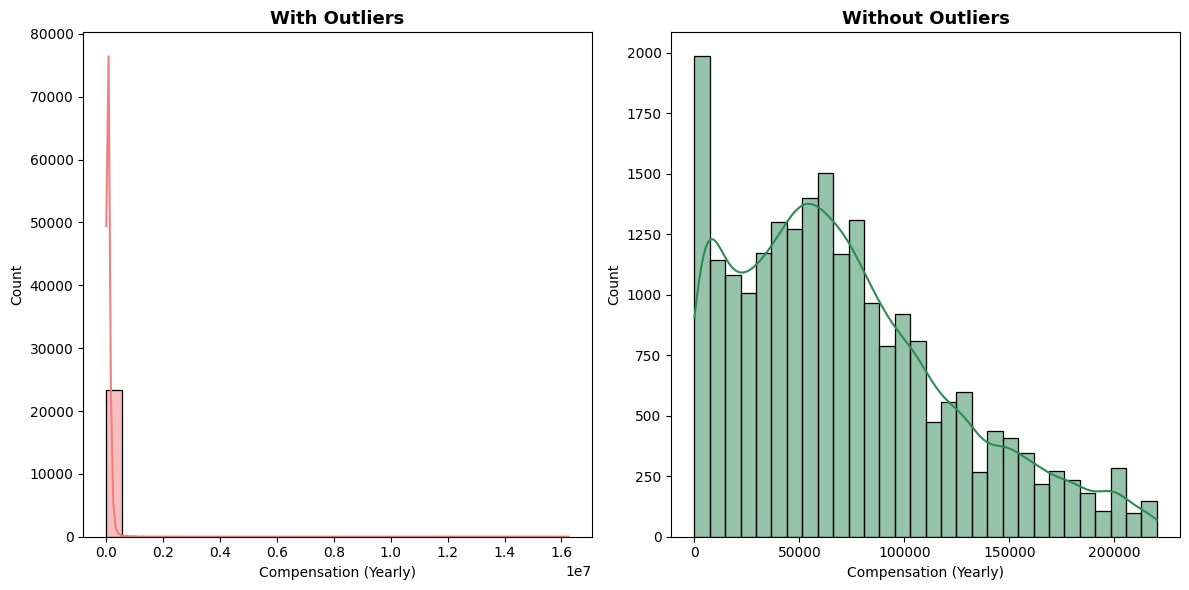

In [12]:
#A side-by-side comparison
# Histogram Comparison
plt.figure(figsize=(12,6))

# Histogram with outliers
plt.subplot(1,2,1)
sns.histplot(df["ConvertedCompYearly"].dropna(), bins=30, kde=True, color="lightcoral")
plt.title("With Outliers", fontsize=13, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.ylabel("Count")

# Histogram without outliers
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["ConvertedCompYearly"], bins=30, kde=True, color="seagreen")
plt.title("Without Outliers", fontsize=13, weight="bold")
plt.xlabel("Compensation (Yearly)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation of Age with other numeric variables:
Age_num                1.000000
WorkExp                0.844212
ConvertedCompYearly    0.122113
JobSat                 0.064930
CompTotal             -0.002756
JobSatPoints_1        -0.026705
ResponseId            -0.037245
JobSatPoints_8        -0.047250
JobSatPoints_6        -0.051512
JobSatPoints_4        -0.075301
JobSatPoints_9        -0.083271
JobSatPoints_7        -0.084769
JobSatPoints_5        -0.101053
JobSatPoints_11       -0.105846
JobSatPoints_10       -0.114398
Name: Age_num, dtype: float64


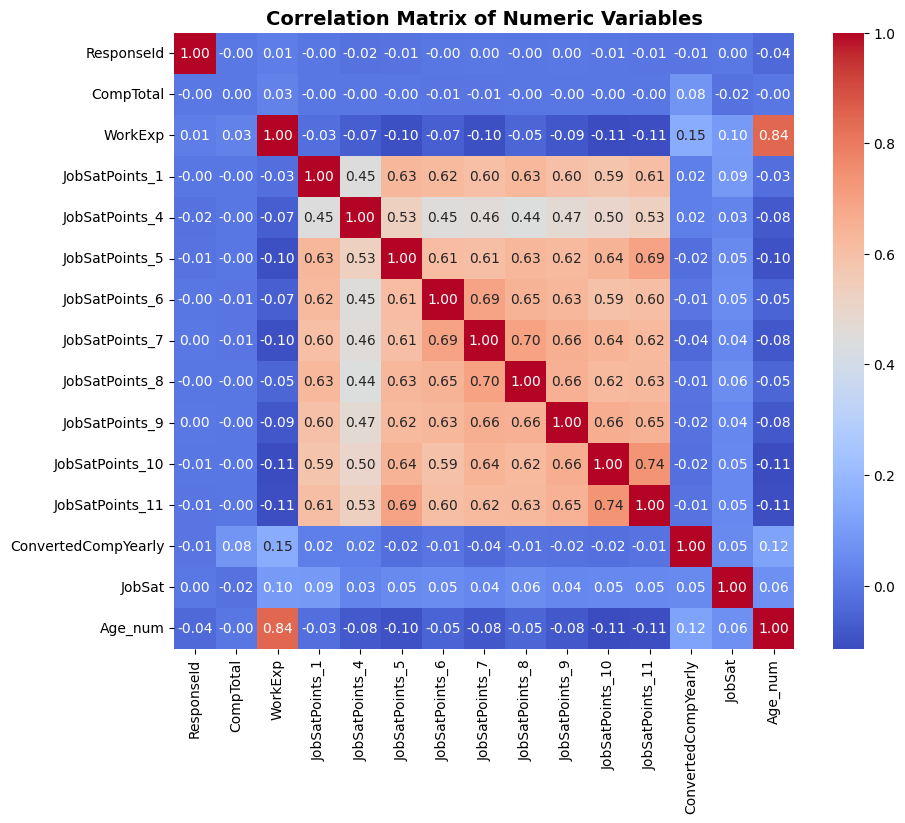

In [13]:
##Write your code here
# %%
# Step 6: Correlation Analysis

import numpy as np

# --- 1. Transform Age column ---
def transform_age(age):
    """
    Convert Age ranges/labels to approximate numeric values.
    Adjust mappings if your dataset uses different labels.
    """
    if pd.isna(age):
        return np.nan
    age = str(age).strip()
    if "Under 18" in age:
        return 17
    if "18-24" in age:
        return 21
    if "25-34" in age:
        return 29.5
    if "35-44" in age:
        return 39.5
    if "45-54" in age:
        return 49.5
    if "55-64" in age:
        return 59.5
    if "65 or older" in age:
        return 70
    try:
        return float(age)
    except:
        return np.nan

# Apply transformation
df["Age_num"] = df["Age"].apply(transform_age)

# --- 2. Select only numeric columns ---
numeric_df = df.select_dtypes(include=[np.number])

# --- 3. Compute correlation matrix ---
corr_matrix = numeric_df.corr(method="pearson")

print("Correlation of Age with other numeric variables:")
print(corr_matrix["Age_num"].sort_values(ascending=False))

# --- 4. Visualize correlation matrix ---
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables", fontsize=14, weight="bold")
plt.show()

Focused Correlation Matrix (Age vs key variables):
                   Age_num  CompTotal_num  YearsCodePro_num
Age_num           1.000000      -0.002756          0.823051
CompTotal_num    -0.002756       0.000000         -0.002457
YearsCodePro_num  0.823051      -0.002457          1.000000


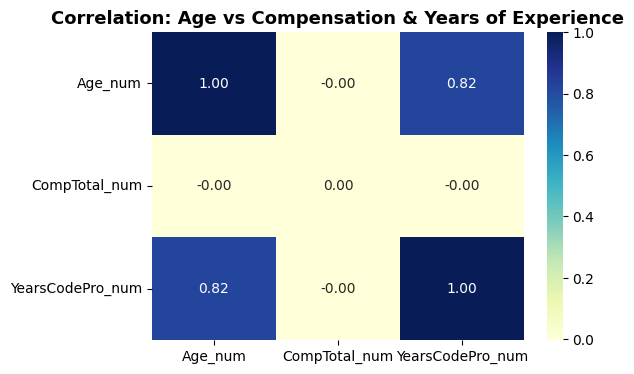

In [14]:
# %%
# Focused correlation heatmap: Age vs key variables

# Pick key numeric columns to compare with Age
key_vars = ["Age_num", "CompTotal", "YearsCodePro"]

# Ensure they're numeric
df["CompTotal_num"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df["YearsCodePro_num"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Subset dataframe
subset = df[["Age_num", "CompTotal_num", "YearsCodePro_num"]]

# Compute correlations
focused_corr = subset.corr(method="pearson")

print("Focused Correlation Matrix (Age vs key variables):")
print(focused_corr)

# Heatmap visualization
plt.figure(figsize=(6,4))
sns.heatmap(focused_corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Correlation: Age vs Compensation & Years of Experience", fontsize=13, weight="bold")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
